In [1]:
import jax.numpy as jnp
import numpy as np
from jax.scipy.stats import norm
from scipy.stats import invgamma
import matplotlib.pyplot as plt

import constants as cs

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Observe mu distributions

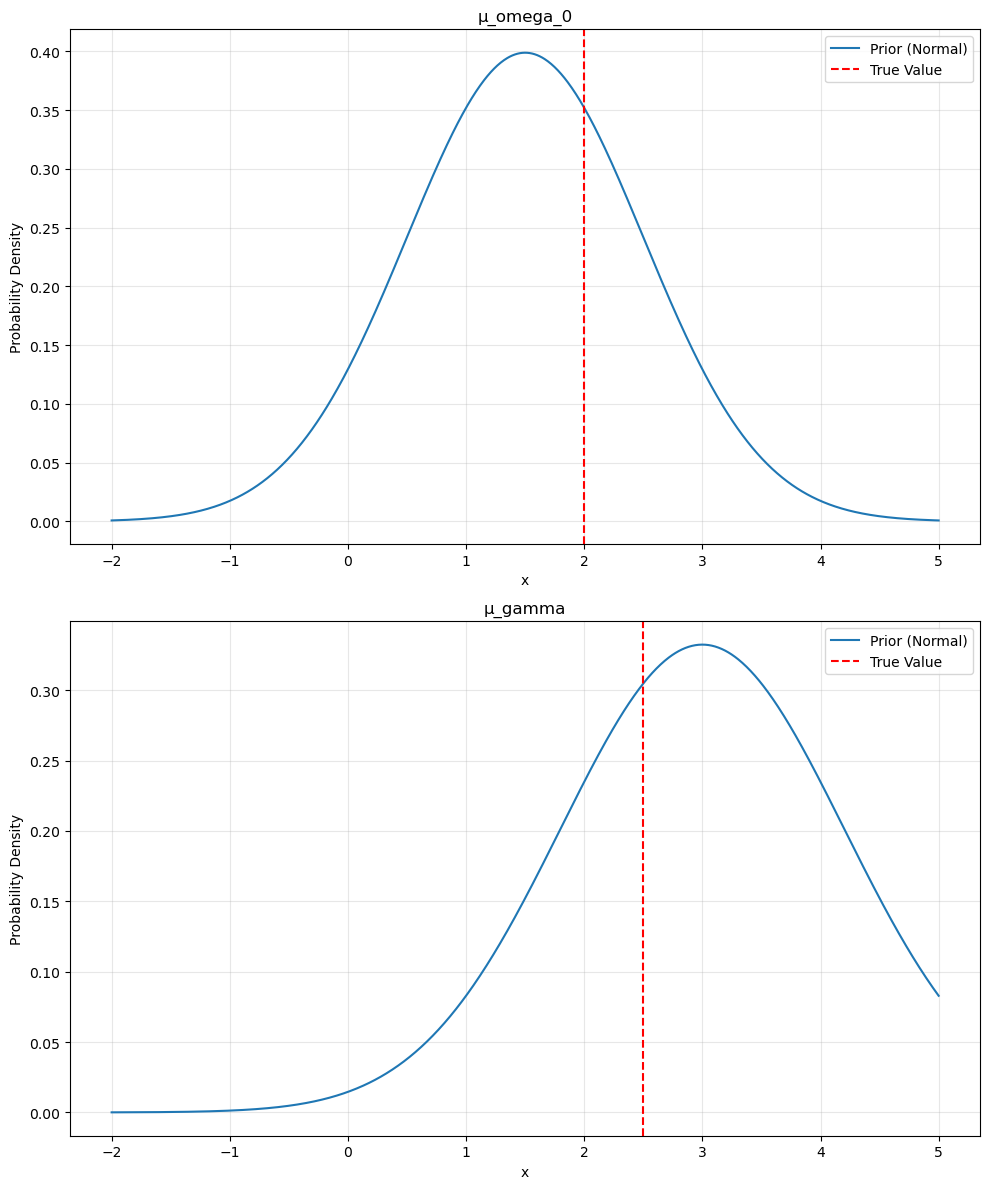

In [3]:
# Create x values for plotting
x = jnp.linspace(-2, 5, 1000)

# Create figure with 2 subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))
axes = [ax1, ax2]
labels = ['omega_0', 'gamma']

# Plot each distribution in its own subplot
for ax, mu_prior, sigma_prior, true_value, label in zip(axes, cs.MU_PHI, cs.SIGMA_PHI, cs.MU_TARGET, labels):
    y_prior = norm.pdf(x, loc=mu_prior, scale=sigma_prior)
    ax.plot(x, y_prior, label='Prior (Normal)')
    ax.axvline(x=true_value, color='r', linestyle='--', label='True Value')
    ax.set_title(f'μ_{label}')
    ax.set_xlabel('x')
    ax.set_ylabel('Probability Density')
    ax.grid(True, alpha=0.3)
    ax.legend()

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

## Observe tau distributions

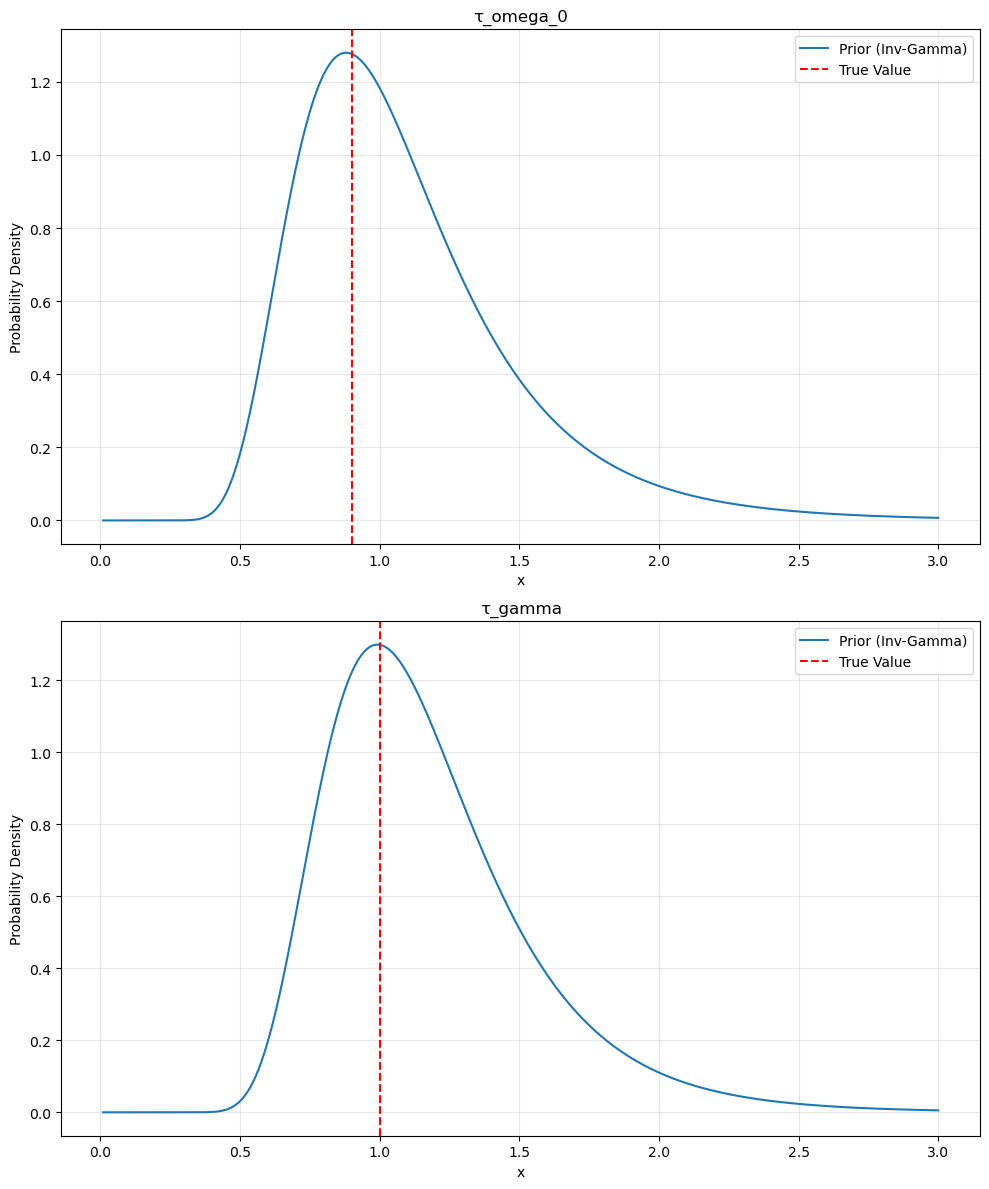

In [4]:
# Create x values for plotting (using numpy since we're using scipy.stats)
x = np.linspace(0.01, 3, 1000)

# Create figure with 3 subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))
axes = [ax1, ax2]
labels = ['omega_0', 'gamma']

# Plot each distribution in its own subplot
for ax, a, b, true_value, label in zip(axes, cs.A_PHI, cs.B_PHI, cs.TAU_TARGET, labels):
    y_prior = invgamma.pdf(x, a=a, scale=b)
    ax.plot(x, y_prior, label='Prior (Inv-Gamma)')
    ax.axvline(x=true_value, color='r', linestyle='--', label='True Value')
    ax.set_title(f'τ_{label}')
    ax.set_xlabel('x')
    ax.set_ylabel('Probability Density')
    ax.grid(True, alpha=0.3)
    ax.legend()

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

# Generate observations

## Sample parameters z_(n) given hyperparameters

## Generate observations y_(n) from parameters z_(n)  

In [5]:
from jax import random

import sampled_distributions as sd
import data_generation as data_gen

In [6]:
number_systems = 5
# observation_noise = cs.OBSERVATION_NOISE
observation_noise = 5e-2

In [7]:
key_true_observations = random.key(number_systems)
key_sample_params_from_true_values, key_true_obs_gen, key_regularised_divergence = random.split(key_true_observations, 3)
sampled_params = sd.sample_lognormal(key_sample_params_from_true_values, mu=cs.MU_TARGET, tau=cs.TAU_TARGET, m=number_systems)
target_observations_from_sampled_params = data_gen.generate_observations(sampled_params, key_true_obs_gen, observation_noise)


In [8]:
N = cs. OBSERVATION_LENGTH
T = cs.T

# Create time array
t = jnp.linspace(0, cs.T, cs.N_SAMPLES)

# Plot results
plt.figure(figsize=(12, 4))
plt.subplot(2, 1, 1)
for i, observation in enumerate(target_observations_from_sampled_params):
    plt.plot(t, observation, label=f'Observation{i}')
plt.ylabel('Position')
plt.title('Damped Pendulum Simulation')
plt.legend()
plt.tight_layout()
plt.show()

AttributeError: module 'constants' has no attribute 'N_SAMPLES'